## HYPOTHESIS ##

"Given the current state of the table and past seasons table, what's the realistic probability that each team could still win ?"

1. Who is most likely to win LaLiga this year based on previous 10 years?
2. Who are the 2 teams that wil most likely be relegated
3. Which team that will most likely go to conference league (7th position) 

In [3]:
import pandas as pd

full_data= pd.read_csv("Data Scraping/la_liga_data_2014_2025.csv")
print(full_data.shape)

(220, 20)


In [5]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [7]:
full_data.head(20)

,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90
0,1,Barcelona,38,30,4,4,110,21,89,94,2.47,77632.0,Lionel Messi - 43,Claudio Bravo,→ Champions League via Champions League win,2014,NaN,NaN,NaN,NaN
1,2,Real Madrid,38,30,2,6,118,38,80,92,2.42,73545.0,Cristiano Ronaldo - 48,Iker Casillas,→ Champions League via league finish,2014,NaN,NaN,NaN,NaN
2,3,Atlético Madrid,38,23,9,6,67,29,38,78,2.05,46454.0,Antoine Griezmann - 22,Miguel Ángel Moyá,→ Champions League via league finish,2014,NaN,NaN,NaN,NaN
3,4,Valencia,38,22,11,5,70,32,38,77,2.03,43125.0,Daniel Parejo - 12,Diego Alves,→ Champions League via league finish,2014,NaN,NaN,NaN,NaN
4,5,Sevilla,38,23,7,8,71,45,26,76,2.00,30878.0,Carlos Bacca - 20,Sergio Rico,→ Champions League via Europa League win,2014,NaN,NaN,NaN,NaN
5,6,Villarreal,38,16,12,10,48,37,11,60,1.58,16375.0,Luciano Vietto - 12,Sergio Asenjo,→ Europa League via league finish 1,2014,NaN,NaN,NaN,NaN
6,7,Athletic Club,38,15,10,13,42,41,1,55,1.45,40654.0,Aritz Aduriz - 18,Gorka Iraizoz,→ Europa League via league finish,2014,NaN,NaN,NaN,NaN
7,8,Celta Vigo,38,13,12,13,47,44,3,51,1.34,19039.0,Nolito - 13,Sergio Álvarez,NaN,2014,NaN,NaN,NaN,NaN
8,9,Málaga,38,14,8,16,42,48,-6,50,1.32,22333.0,Juanmi - 8,Carlos Kameni,NaN,2014,NaN,NaN,NaN,NaN
9,10,Espanyol,38,13,10,15,47,51,-4,49,1.29,18694.0,Sergio García - 14,Kiko Casilla,NaN,2014,NaN,NaN,NaN,NaN


DATA EXPLORATION

In [8]:
full_data['squad'].value_counts()

squad
Barcelona          11
Villarreal         11
Real Madrid        11
Celta Vigo         11
Athletic Club      11
Real Sociedad      11
Sevilla            11
Valencia           11
Atlético Madrid    11
Betis              10
Getafe             10
Espanyol            9
Alavés              8
Levante             7
Rayo Vallecano      7
Granada             7
Eibar               7
Osasuna             7
Valladolid          5
Girona              5
Mallorca            5
Las Palmas          5
Leganés             5
La Coruña           4
Elche               4
Málaga              4
Cádiz               4
Almería             3
Sporting Gijón      2
Huesca              2
Córdoba             1
Name: count, dtype: int64

In [11]:
#Top 3 ranking count per team
full_data['squad'].groupby(full_data['rk']).value_counts()

rk  squad          
1   Barcelona          6
    Real Madrid        4
    Atlético Madrid    1
2   Real Madrid        5
    Barcelona          4
    Atlético Madrid    2
3   Atlético Madrid    7
    Real Madrid        2
    Barcelona          1
    Girona             1
4   Sevilla            4
    Valencia           3
    Athletic Club      1
    Atlético Madrid    1
    Real Sociedad      1
    Villarreal         1
5   Villarreal         5
    Athletic Club      2
    Betis              1
    Getafe             1
    Real Sociedad      1
    Sevilla            1
6   Betis              4
    Real Sociedad      4
    Celta Vigo         1
    Sevilla            1
    Villarreal         1
7   Athletic Club      2
    Sevilla            2
    Villarreal         2
    Betis              1
    Celta Vigo         1
    Espanyol           1
    Granada            1
    Osasuna            1
8   Athletic Club      3
    Celta Vigo         2
    Getafe             2
    Espanyol           1
    M

In [13]:
import plotly.express as px

#Get the top 3 ranks only
ranking_counts = full_data['squad'].groupby(full_data['rk']).value_counts().reset_index(name='count')

ranking_counts

,rk,squad,count
0,1,Barcelona,6
1,1,Real Madrid,4
2,1,Atlético Madrid,1
3,2,Real Madrid,5
4,2,Barcelona,4
5,2,Atlético Madrid,2
6,3,Atlético Madrid,7
7,3,Real Madrid,2
8,3,Barcelona,1
9,3,Girona,1


In [14]:
#Keep only top 3 ranks
ranking_counts_top = ranking_counts[ranking_counts['rk'].isin([1,2,3])]
ranking_counts_top

,rk,squad,count
0,1,Barcelona,6
1,1,Real Madrid,4
2,1,Atlético Madrid,1
3,2,Real Madrid,5
4,2,Barcelona,4
5,2,Atlético Madrid,2
6,3,Atlético Madrid,7
7,3,Real Madrid,2
8,3,Barcelona,1
9,3,Girona,1


In [15]:
#Plot 
fig = px.bar(ranking_counts, x='squad', y='count', color='rk', barmode='group',
             title='Top Finishes by Team and Rank (Last 10 Years)',
              labels={'squad': 'Team', 'count': 'Finish Count', 'rk': 'Rank'})

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [16]:
#Plot 
fig = px.bar(ranking_counts_top, x='squad', y='count', color='rk', barmode='group',
             title='Top Finishes by Team and Rank (Last 10 Years)',
              labels={'squad': 'Team', 'count': 'Finish Count', 'rk': 'Rank'})

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [17]:
full_data.describe()

,rk,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,season,xg,xga,xgd,xgd/90
count,220.000000,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.00000,220.00000,220.000000,204.000000,220.000000,160.000000,160.000000,160.000000,160.000000
mean,10.500000,38.0,14.063636,9.872727,14.063636,49.900000,49.900000,0.00000,52.05000,1.370000,26453.098039,2019.000000,48.841875,48.843750,0.000625,-0.000312
std,5.779431,0.0,6.214987,2.914643,5.476854,17.750915,13.141277,26.75391,17.47411,0.459624,18088.531993,3.169489,11.621123,8.621326,17.129523,0.450948
min,1.000000,38.0,3.000000,2.000000,1.000000,22.000000,18.000000,-64.00000,16.00000,0.420000,91.000000,2014.000000,29.300000,32.500000,-33.000000,-0.870000
25%,5.750000,38.0,10.000000,8.000000,10.000000,38.000000,41.000000,-17.00000,41.00000,1.080000,13677.500000,2016.000000,40.575000,42.875000,-11.000000,-0.290000
50%,10.500000,38.0,13.000000,10.000000,15.000000,46.000000,50.000000,-6.00000,48.50000,1.275000,19957.000000,2019.000000,45.850000,48.300000,-3.150000,-0.080000
75%,15.250000,38.0,17.250000,12.000000,18.000000,57.000000,58.000000,13.00000,61.00000,1.610000,37320.500000,2022.000000,53.975000,54.425000,11.000000,0.292500
max,20.000000,38.0,30.000000,18.000000,30.000000,118.000000,94.000000,89.00000,95.00000,2.500000,83498.000000,2024.000000,91.500000,76.200000,49.500000,1.300000


In [18]:
# Filter the dataset for teams that finished 1st each season

winning_teams= full_data[full_data['rk']==1][["season","squad","pts","pts/mp","gd"]].sort_values("season")

print(winning_teams)

     season            squad  pts  pts/mp  gd
0      2014        Barcelona   94    2.47  89
20     2015        Barcelona   91    2.39  83
40     2016      Real Madrid   93    2.45  65
60     2017        Barcelona   93    2.45  70
80     2018        Barcelona   87    2.29  54
100    2019      Real Madrid   87    2.29  45
120    2020  Atlético Madrid   86    2.26  42
140    2021      Real Madrid   86    2.26  49
160    2022        Barcelona   88    2.32  50
180    2023      Real Madrid   95    2.50  61
200    2024        Barcelona   88    2.32  63


In [19]:
# Filter the winning teams from the past 10 years, excluding the current season
winning_teams_past_10 = full_data[(full_data['rk']==1) & (full_data["season"]<2024)]

avg_pts_mp_winners = winning_teams_past_10["pts/mp"].mean()

# Display the Result
print(f"Average Pts/MP for past 10 winning teams (excluding this year): {avg_pts_mp_winners}")

Average Pts/MP for past 10 winning teams (excluding this year): 2.368


In [20]:
# Convert 'rk' to binary (1 if team won the league, 0 otherwise)
full_data["is_champion"] = (full_data["rk"]==1).astype(int)

# Filter only championship-winning teams
champions_only = full_data[full_data["is_champion"]==1]

In [21]:
full_data.head()

,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90,is_champion
0,1,Barcelona,38,30,4,4,110,21,89,94,2.47,77632.0,Lionel Messi - 43,Claudio Bravo,→ Champions League via Champions League win,2014,NaN,NaN,NaN,NaN,1
1,2,Real Madrid,38,30,2,6,118,38,80,92,2.42,73545.0,Cristiano Ronaldo - 48,Iker Casillas,→ Champions League via league finish,2014,NaN,NaN,NaN,NaN,0
2,3,Atlético Madrid,38,23,9,6,67,29,38,78,2.05,46454.0,Antoine Griezmann - 22,Miguel Ángel Moyá,→ Champions League via league finish,2014,NaN,NaN,NaN,NaN,0
3,4,Valencia,38,22,11,5,70,32,38,77,2.03,43125.0,Daniel Parejo - 12,Diego Alves,→ Champions League via league finish,2014,NaN,NaN,NaN,NaN,0
4,5,Sevilla,38,23,7,8,71,45,26,76,2.00,30878.0,Carlos Bacca - 20,Sergio Rico,→ Champions League via Europa League win,2014,NaN,NaN,NaN,NaN,0


In [22]:
# Calculate the mean of 'pts/mp'
mean_pts_mp = champions_only["pts/mp"].mean()

print(f"Mean of 'pts/mp': {mean_pts_mp:.2f}")

Mean of 'pts/mp': 2.36


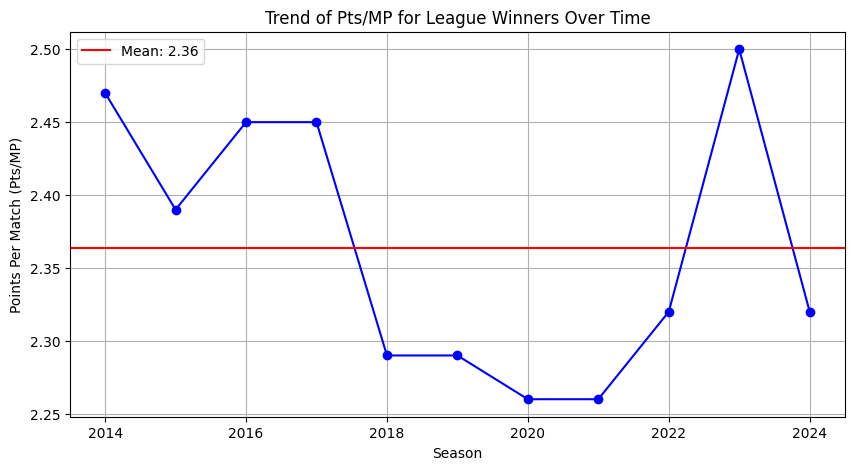

In [23]:
import matplotlib.pyplot as plt

# Plot trend of 'pts/mp' for champions over the years
plt.figure(figsize=(10,5))
plt.plot(champions_only['season'], champions_only['pts/mp'], marker="o", linestyle = "-", color='b')
plt.axhline(y=mean_pts_mp, color='r', linestyle='-', label=f'Mean: {mean_pts_mp:.2f}')
plt.xlabel("Season")
plt.ylabel("Points Per Match (Pts/MP)")
plt.title("Trend of Pts/MP for League Winners Over Time")
plt.grid(True)
plt.legend()
plt.show()

ML MODELLING & PREDICTIONS


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

In [25]:
# Calculate how many games each team has left to play (La Liga has total of 38 games)
full_data['games_left']= 38-full_data['mp']

# Estimate the final number of points if each team keeps their current pace
full_data['projected_pts']= full_data['pts'] + full_data['games_left'] * full_data['pts/mp']

# Create a binary column to indicate if a team was champion that season (1=champion, 0=not)
full_data["is_champion"]= (full_data['rk']==1).astype(int)

In [26]:
full_data.tail(3)

,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90,is_champion,games_left,projected_pts
217,18,Leganés,38,9,13,16,39,56,-17,40,1.05,11135.0,Dani Raba - 8,Marko Dmitrović,Relegated,2024,36.0,59.4,-23.4,-0.62,0,0,40.0
218,19,Las Palmas,38,8,8,22,40,61,-21,32,0.84,23010.0,Fábio Silva - 10,Jasper Cillessen,Relegated,2024,36.3,66.8,-30.5,-0.80,0,0,32.0
219,20,Valladolid,38,4,4,30,26,90,-64,16,0.42,19831.0,Mamadou Sylla - 5,Karl Jakob Hein,Relegated,2024,34.6,67.6,-33.0,-0.87,0,0,16.0


In [28]:
# Define the features (inputs) the model will use
features = ['pts/mp', 'gd', 'w', 'l', 'projected_pts']

# Create training data: all seasons before 2024
df_train = full_data[full_data["season"]<2024]

# Create testing data: only the 2024 season (current one)
df_test= full_data[full_data['season']==2024].copy()

# Define feature matrix (X) and target variable (y)
X_train = df_train[features]
y_train = df_train["is_champion"]
X_test = df_test[features]
# y_test = df_test["is_champion"]

In [29]:
# Initialize the model with 200 trees and a fixed random state for reproducibility
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [31]:
# Predict binary outcomes (0 or 1) on training set
train_preds= model.predict(X_train)

# Predict probabilities of being champion
train_probs = model.predict_proba(X_train)[:, 1]

# Compute accuracy
accuracy = accuracy_score(y_train, train_preds)

# Compute ROC AOC score 
roc_auc = roc_auc_score(y_train, train_probs)

# Compute log loss (lower is better)
logloss = log_loss(y_train, train_probs)

# Print performance metrices
print(f"\n Model Performance on Historical data")
print(f"Accuracy: {accuracy:.3f}")
print(f"ROC AUC Score: {roc_auc:.3f}")
print(f"Log Loss: {logloss:.3f}")

#Print detailed classification performance
print("\n Classification Report :")
print(classification_report(y_train, train_preds))

# Show conufusion matrix (true vs predicted value)
print("Confusion Matrix: ")
print(confusion_matrix(y_train, train_preds))


 Model Performance on Historical data
Accuracy: 1.000
ROC AUC Score: 1.000
Log Loss: 0.014

 Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00        10

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix: 
[[190   0]
 [  0  10]]


In [32]:
# Predict probability of becoming champion
df_test["win_probability"]= model.predict_proba(X_test)[:,1]


In [35]:
df_test.head(10)

,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90,is_champion,games_left,projected_pts,win_probability
200,1,Barcelona,38,28,4,6,102,39,63,88,2.32,45953.0,Robert Lewandowski - 27,Iñaki Peña,→ Champions League via league finish,2024,91.5,41.9,49.5,1.30,1,0,88.0,0.685
201,2,Real Madrid,38,26,6,6,78,38,40,84,2.21,69807.0,Kylian Mbappé - 31,Thibaut Courtois,→ Champions League via league finish,2024,75.3,42.8,32.5,0.86,0,0,84.0,0.110
202,3,Atlético Madrid,38,22,10,6,68,30,38,76,2.00,60883.0,Alexander Sørloth - 20,Jan Oblak,→ Champions League via league finish,2024,64.6,33.4,31.2,0.82,0,0,76.0,0.000
203,4,Athletic Club,38,19,13,6,54,29,25,70,1.84,48420.0,Oihan Sancet - 15,Unai Simón,→ Champions League via league finish,2024,53.0,37.8,15.2,0.40,0,0,70.0,0.000
204,5,Villarreal,38,20,10,8,71,51,20,70,1.84,18266.0,Ayoze Pérez - 19,Diego Conde,→ Europa League via league finish,2024,64.8,44.4,20.4,0.54,0,0,70.0,0.000
205,6,Betis,38,16,12,10,57,50,7,60,1.58,51542.0,Isco - 9,Adrián,→ Europa League via league finish,2024,54.7,50.6,4.1,0.11,0,0,60.0,0.000
206,7,Celta Vigo,38,16,7,15,59,57,2,55,1.45,21504.0,Borja Iglesias - 11,Vicente Guaita,→ Conference League via league finish,2024,54.2,43.4,10.9,0.29,0,0,55.0,0.000
207,8,Rayo Vallecano,38,13,13,12,41,45,-4,52,1.37,12908.0,Jorge de Frutos - 6,Augusto Batalla,NaN,2024,45.4,49.0,-3.5,-0.09,0,0,52.0,0.000
208,9,Osasuna,38,12,16,10,48,52,-4,52,1.37,20476.0,Ante Budimir - 21,Sergio Herrera,NaN,2024,44.0,53.7,-9.6,-0.25,0,0,52.0,0.000
209,10,Mallorca,38,13,9,16,35,44,-9,48,1.26,18502.0,"Cyle Larin, Vedat Muriqi - 7",Dominik Greif,NaN,2024,38.8,46.8,-8.1,-0.21,0,0,48.0,0.000


In [36]:

# Normalize the probabilities so that all teams add up to 100%
df_test["win_probability_%"]= df_test["win_probability"] / df_test["win_probability"].sum() *100

# Round the values for better readability
df_test["win_probability_%"]= df_test["win_probability_%"].round(3)

In [37]:
df_test.head(10)

,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90,is_champion,games_left,projected_pts,win_probability,win_probability_%
200,1,Barcelona,38,28,4,6,102,39,63,88,2.32,45953.0,Robert Lewandowski - 27,Iñaki Peña,→ Champions League via league finish,2024,91.5,41.9,49.5,1.30,1,0,88.0,0.685,86.164
201,2,Real Madrid,38,26,6,6,78,38,40,84,2.21,69807.0,Kylian Mbappé - 31,Thibaut Courtois,→ Champions League via league finish,2024,75.3,42.8,32.5,0.86,0,0,84.0,0.110,13.836
202,3,Atlético Madrid,38,22,10,6,68,30,38,76,2.00,60883.0,Alexander Sørloth - 20,Jan Oblak,→ Champions League via league finish,2024,64.6,33.4,31.2,0.82,0,0,76.0,0.000,0.000
203,4,Athletic Club,38,19,13,6,54,29,25,70,1.84,48420.0,Oihan Sancet - 15,Unai Simón,→ Champions League via league finish,2024,53.0,37.8,15.2,0.40,0,0,70.0,0.000,0.000
204,5,Villarreal,38,20,10,8,71,51,20,70,1.84,18266.0,Ayoze Pérez - 19,Diego Conde,→ Europa League via league finish,2024,64.8,44.4,20.4,0.54,0,0,70.0,0.000,0.000
205,6,Betis,38,16,12,10,57,50,7,60,1.58,51542.0,Isco - 9,Adrián,→ Europa League via league finish,2024,54.7,50.6,4.1,0.11,0,0,60.0,0.000,0.000
206,7,Celta Vigo,38,16,7,15,59,57,2,55,1.45,21504.0,Borja Iglesias - 11,Vicente Guaita,→ Conference League via league finish,2024,54.2,43.4,10.9,0.29,0,0,55.0,0.000,0.000
207,8,Rayo Vallecano,38,13,13,12,41,45,-4,52,1.37,12908.0,Jorge de Frutos - 6,Augusto Batalla,NaN,2024,45.4,49.0,-3.5,-0.09,0,0,52.0,0.000,0.000
208,9,Osasuna,38,12,16,10,48,52,-4,52,1.37,20476.0,Ante Budimir - 21,Sergio Herrera,NaN,2024,44.0,53.7,-9.6,-0.25,0,0,52.0,0.000,0.000
209,10,Mallorca,38,13,9,16,35,44,-9,48,1.26,18502.0,"Cyle Larin, Vedat Muriqi - 7",Dominik Greif,NaN,2024,38.8,46.8,-8.1,-0.21,0,0,48.0,0.000,0.000


In [38]:
# Sort the test DataFrame by win probability descending
df_test= df_test.sort_values("projected_pts", ascending=False)
print("\n Championship Win Probabilities (2024):")
df_test[["squad","pts","projected_pts","pts/mp", "gd", "games_left", "win_probability_%"]]


 Championship Win Probabilities (2024):


,squad,pts,projected_pts,pts/mp,gd,games_left,win_probability_%
200,Barcelona,88,88.0,2.32,63,0,86.164
201,Real Madrid,84,84.0,2.21,40,0,13.836
202,Atlético Madrid,76,76.0,2.00,38,0,0.000
203,Athletic Club,70,70.0,1.84,25,0,0.000
204,Villarreal,70,70.0,1.84,20,0,0.000
205,Betis,60,60.0,1.58,7,0,0.000
206,Celta Vigo,55,55.0,1.45,2,0,0.000
207,Rayo Vallecano,52,52.0,1.37,-4,0,0.000
208,Osasuna,52,52.0,1.37,-4,0,0.000
209,Mallorca,48,48.0,1.26,-9,0,0.000


In [43]:
import plotly.express as px

# Sort by projected_pts (descending)
df_test_sorted = df_test.sort_values("projected_pts", ascending=False)

# Plot bar chart
fig = px.bar(
    df_test_sorted,
    x="squad",
    y="win_probability_%",
    color_discrete_sequence=["#1f77b4"],
    title="Championship Win Probabilities (2024 Season)",
    labels={"squad":"Team", "win_probability_%": "Win Probability (%)"}
)

fig.show()

- Based on our analysis Barcelona has 86.164% chances of being the champion of Spain followed by Real Madrid 13.836% 
- The 7th Position for the conference league is most like gonna be Celta Vigo (based on Projected points)
- The relegated teams will most likely be 'Las Palmas' and 'Valladolid'